# Section 3
## Bayesian Rule

###### Introduction
<img src="Intro.png">

## Bayesian Rule
In this tutorial you are going to learn about the Naive Bayes algorithm including how it works and how to implement it from scratch in Python (without libraries). We can use probability to make predictions in machine learning. Perhaps the most widely used example is called the Naive Bayes algorithm. Not only is it straightforward to understand, but it also achieves surprisingly good results on a wide range of problems. provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes’ Theorem is stated as:

$$p(class|data)= \frac{p(data|class)*p(class)}{p(data)}$$
Note that in lecture: 
$$P(W|X)=\frac{P(X|W)*P(W)}{P(X)}$$

$$ posterior=\frac{likelihood*prior}{evidence}$$

<img src="Definitions.PNG">


### MultiVariate problem
if we have more than one feature and those features doesn't depend on each other

Note That: Joint Probability of two Independent variable 

$$ P(A,B)=P(A)*P(B) $$

$$ P(class = 0 |x,y) = P(x,y|class = 0) * P(class =0 ) $$
x and y are independent features hence:

$$ P(class = 0 |x,y) = P(x|class = 0) * P(y|class = 0) * P(class =0 ) $$

### Example
<img src="Example.png">

### Why do we use posterior not Likelihood??
bec. we should take into consideration the prior knowledge, how many instances of this class are found in the training data
<img src="LikelihoodVsPosterior.png">

 Special Case:if priors are equal i.e, $$ P(ω1)= P(ω2)$$ then the decision is entirely based on class conditionals $$ p(x|ω) $$


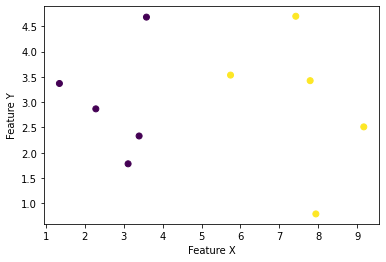

In [13]:

# generate some data
import matplotlib.pyplot as plt
#
dataset = [[3.393533211,2.331273381,0],
[3.110073483,1.781539638,0],
[1.343808831,3.368360954,0],
[3.582294042,4.67917911,0],
[2.280362439,2.866990263,0],
[7.423436942,4.696522875,1],
[5.745051997,3.533989803,1],
[9.172168622,2.511101045,1],
[7.792783481,3.424088941,1],
[7.939820817,0.791637231,1]]
x = [x[0]  for x in dataset]
y = [x[1]  for x in dataset]
c = [x[2]  for x in dataset]
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.scatter(x, y, c=c)


In [29]:

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

separated = separate_by_class(dataset)
separated

{0: [[3.393533211, 2.331273381, 0],
  [3.110073483, 1.781539638, 0],
  [1.343808831, 3.368360954, 0],
  [3.582294042, 4.67917911, 0],
  [2.280362439, 2.866990263, 0]],
 1: [[7.423436942, 4.696522875, 1],
  [5.745051997, 3.533989803, 1],
  [9.172168622, 2.511101045, 1],
  [7.792783481, 3.424088941, 1],
  [7.939820817, 0.791637231, 1]]}

In [30]:
from math import sqrt
#Calculation of mean
def mean(numbers):
    return sum(numbers)/float(len(numbers))
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries
summary = summarize_dataset(dataset)
summary

[(5.178333386499999, 2.7665845055177263, 10),
 (2.9984683241, 1.218556343617447, 10)]

In [31]:
# Class statistics claculation
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries
summary = summarize_by_class(dataset)
summary

{0: [(2.7420144012, 0.9265683289298018, 5),
  (3.0054686692, 1.1073295894898725, 5)],
 1: [(7.6146523718, 1.2344321550313704, 5),
  (2.9914679790000003, 1.4541931384601618, 5)]}


#### Gaussian Probability Density Function
Calculating the probability or likelihood of observing a given real-value like X1 is difficult.

One way we can do this is to assume that X1 values are drawn from a distribution, such as a bell curve or Gaussian distribution. A Gaussian distribution can be summarized using only two numbers: the mean and the standard deviation. Therefore, with a little math, we can estimate the probability of a given value. This piece of math is called a Gaussian Probability Distribution Function (or Gaussian PDF) and can be calculated as:

$$f(x)= \frac{1}{\sqrt{2 \pi} * \sigma} \ e^ {\frac{-(x-mean)^2}{2* \sigma ^2}}$$

In [32]:
from math import sqrt, pi, exp

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

$$p(class=0|data)= \frac{p(data|class=0)*p(class=0)}{p(data)}$$


$$p(class=1|data)= \frac{p(data|class=1)*p(class=1)}{p(data)}$$

1. Since the denominator (evidence) is the same for the two PDF functions,
2. denominator is a scaling factor 
3. we will compare the output from the two equations 
   , so it can be ignored


Since the input variables (Features) are treated separately, giving the technique it’s name naive. For the above example where we have 2 input variables, the calculation of the probability that a row belongs to the first class 0 can be calculated as:

$$ P(class = 0 |x,y) = P(x,y|class = 0) * P(class =0 ) $$
x and y are independent features hence:

$$ P(class = 0 |x,y) = P(x|class = 0) * P(y|class = 0) * P(class =0 ) $$

In [40]:
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, newData):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows) #p(class)
        for i in range(len(class_summaries)):
            mean, stdev, count = class_summaries[i]
            probabilities[class_value] *= calculate_probability(newData[i], mean, stdev)
    return probabilities

In [41]:
newData=[2,2]
probabilities = calculate_class_probabilities(summary, newData)
print(probabilities) 

{0: 0.03726847863744294, 1: 1.1310774548075411e-06}


The output showes that the Data[1,1] belongs to class 0
